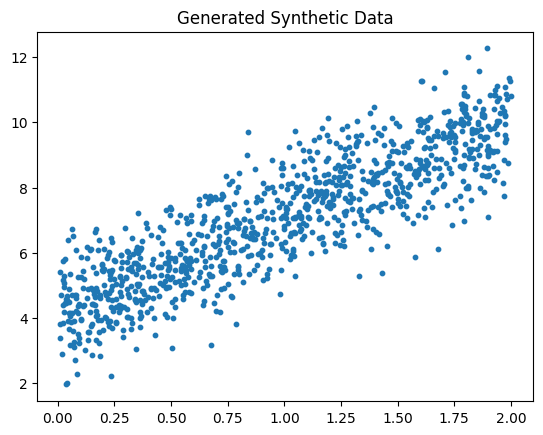

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

plt.scatter(X, y, s=10)
plt.title("Generated Synthetic Data")
plt.show()

In [35]:

def fit_loop(X, y, epochs, lr):
    n = len(X)
    w, b = 0.0, 0.0
    loss_history = []

    for _ in range(epochs):
        dw, db = 0, 0
        total_loss = 0
        for i in range(n):
            y_pred = w * X[i] + b
            error = y[i] - y_pred
            dw += -2 * error * X[i]
            db += -2 * error
            total_loss += error**2

        w -= (dw / n) * lr
        b -= (db / n) * lr
        loss_history.append(total_loss / n)
    return w, b, loss_history

In [37]:
w_l, b_l

(array([2.95664007]), array([4.13509652]))

In [38]:
def fit_vectorized(X, y, epochs, lr):
    n = len(X)
    w, b = 0.0, 0.0
    loss_history = []

    for _ in range(epochs):
        y_pred = X * w + b
        error = y - y_pred

        dw = (-2 / n) * np.sum(error * X)
        db = (-2 / n) * np.sum(error)

        w -= dw * lr
        b -= db * lr
        loss_history.append(np.mean(error**2))
    return w, b, loss_history

In [39]:
w_l, b_l

(array([2.95664007]), array([4.13509652]))

Loop Time: 15.9900s
Vectorized Time: 0.0275s
Speedup: 581.47x


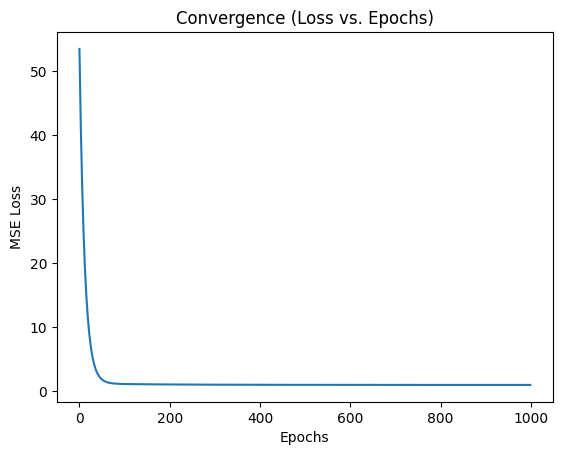

In [27]:
epochs = 1000
lr = 0.01

start = time.time()
w_l, b_l, loss_l = fit_loop(X, y, epochs, lr)
loop_time = time.time() - start

start = time.time()
w_v, b_v, loss_v = fit_vectorized(X, y, epochs, lr)
vec_time = time.time() - start

print(f"Loop Time: {loop_time:.4f}s")
print(f"Vectorized Time: {vec_time:.4f}s")
print(f"Speedup: {loop_time / vec_time:.2f}x")

plt.plot(loss_v)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence (Loss vs. Epochs)")
plt.show()